## Import Essential Library

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

#dataset import
dataset = pd.read_csv('data.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


## Data Processing

In [2]:
dataset['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [3]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:36].values
y = dataset.iloc[:,36:37].values
y[10:40]
print(X.shape)
print(y.shape)

(4424, 36)
(4424, 1)


In [5]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTEENN
import math

bordersmote = SMOTEENN()
X, y = SMOTEENN().fit_resample(X, y)

In [6]:
unique = np.unique(y, return_counts = True)
unique
# (array(['Dropout', 'Enrolled', 'Graduate'], dtype=object),
# array([1020, 1416,  739], dtype=int64))

(array(['Dropout', 'Enrolled', 'Graduate'], dtype=object),
 array([1042, 1437,  743], dtype=int64))

## One - Hot Encoder

In [7]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
# dummy_y[10:40]

## Normalize data

In [8]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

sc = StandardScaler()
X = sc.fit_transform(X)

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X = poly_features.fit_transform(X)

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.1)

## Build model

In [10]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Neural network
model = Sequential()
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 3, activation = 'softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Training

In [12]:
history = model.fit(X_train, y_train, epochs = 300, validation_data = (X_test, y_test))

Epoch 1/300
91/91 [==============================] - 4s 29ms/step - loss: 0.8040 - accuracy: 0.7016 - val_loss: 0.4477 - val_accuracy: 0.8142
Epoch 2/300
91/91 [==============================] - 2s 24ms/step - loss: 0.4016 - accuracy: 0.8634 - val_loss: 0.3731 - val_accuracy: 0.8576
Epoch 3/300
91/91 [==============================] - 2s 24ms/step - loss: 0.2950 - accuracy: 0.8979 - val_loss: 0.4080 - val_accuracy: 0.8576
Epoch 4/300
91/91 [==============================] - 2s 25ms/step - loss: 0.2175 - accuracy: 0.9296 - val_loss: 0.3449 - val_accuracy: 0.8731
Epoch 5/300
91/91 [==============================] - 2s 23ms/step - loss: 0.1937 - accuracy: 0.9331 - val_loss: 0.2755 - val_accuracy: 0.9133
Epoch 6/300
91/91 [==============================] - 2s 22ms/step - loss: 0.1248 - accuracy: 0.9590 - val_loss: 0.3136 - val_accuracy: 0.9071
Epoch 7/300
91/91 [==============================] - 2s 21ms/step - loss: 0.0980 - accuracy: 0.9679 - val_loss: 0.2664 - val_accuracy: 0.9195
Epoch 

In [13]:
max(history.history['val_accuracy'])

0.9566563367843628

## Load model

In [14]:
from tensorflow.keras.models import load_model

In [15]:
model.save('predict_model.h5')

In [16]:
later_model = load_model('predict_model.h5')

In [17]:
losses = pd.DataFrame(model.history.history)

## Evaluate model

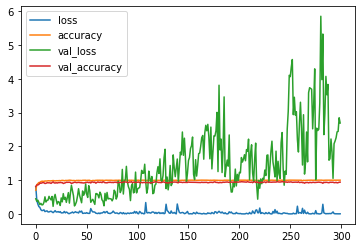

In [18]:
losses.plot()
plt.savefig('losses.png')

In [19]:
import random
random.seed(87)
random_ind = random.randint(0, len(dataset))

new_student = dataset.drop('Target', axis = 1).iloc[random_ind]
new_student

Marital status                                       1.000000
Application mode                                    17.000000
Application order                                    1.000000
Course                                            9853.000000
Daytime/evening attendance                           1.000000
Previous qualification                               1.000000
Previous qualification (grade)                     125.000000
Nacionality                                          1.000000
Mother's qualification                              19.000000
Father's qualification                              19.000000
Mother's occupation                                  4.000000
Father's occupation                                  7.000000
Admission grade                                    128.500000
Displaced                                            1.000000
Educational special needs                            0.000000
Debtor                                               0.000000
Tuition 

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

11/11 [==============================] - 0s 6ms/step


In [22]:
print('Accuracy Score:', accuracy_score(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

Accuracy Score: 0.9380804953560371


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       104
           1       0.90      0.99      0.94       145
           2       0.99      0.89      0.94        74

   micro avg       0.94      0.94      0.94       323
   macro avg       0.95      0.93      0.94       323
weighted avg       0.94      0.94      0.94       323
 samples avg       0.94      0.94      0.94       323



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
